In [1]:
import pandas as pd # Importing the pandas library for data manipulation and analysis
import numpy as np # Importing the numpy library for linear algebra operations
import matplotlib.pyplot as plt # Importing matplotlib.pyplot for data visualization
import seaborn as sns # Importing seaborn for enhanced data visualization, especially for heatmaps
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split # Importing train_test_split to split the dataset into training and testing sets
from sklearn import metrics # Importing metrics for performance evaluation of the model
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to visualize the performance of the classification model
#import shap

In [2]:
# load dataset
df = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [3]:
# show dataset
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
#check empty values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder # some values are not numerical so we need to make them numerical 

feat_encoder = LabelEncoder()

In [6]:
cat_feats = df.select_dtypes(include=['object']).columns # Get categorical columns
print(cat_feats)

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [7]:
# Loop through each categorical feature in the 'cat_feats' list
for cat in cat_feats:

  # Apply the LabelEncoder to transform the categorical column 'cat' into numeric labels.
  df[cat] = feat_encoder.fit_transform(df[cat].astype(str))

In [8]:
df.head(5) # verify change

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


In [9]:
X_columns = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']

X = df[X_columns] # take columns we want for training

In [10]:
Y = df['Churn'] # take the value we want to predict

Some visuals before modelling

C:\Users\mayri\AppData\Local\Temp\ipykernel_22496\1663897627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="viridis")


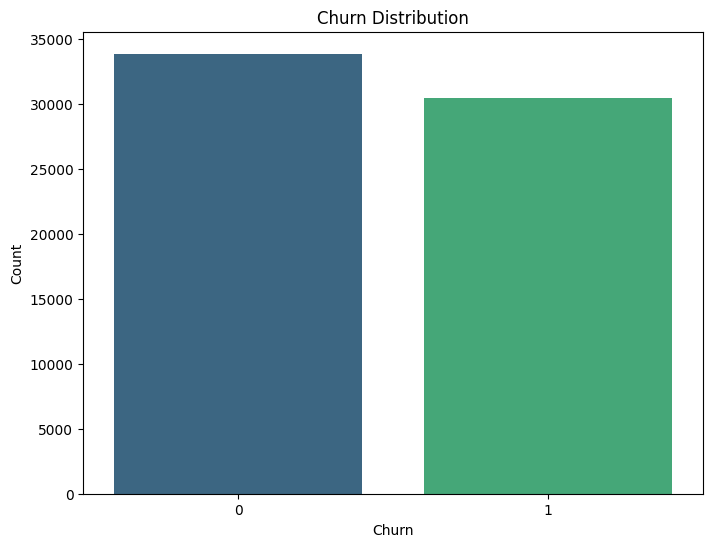

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

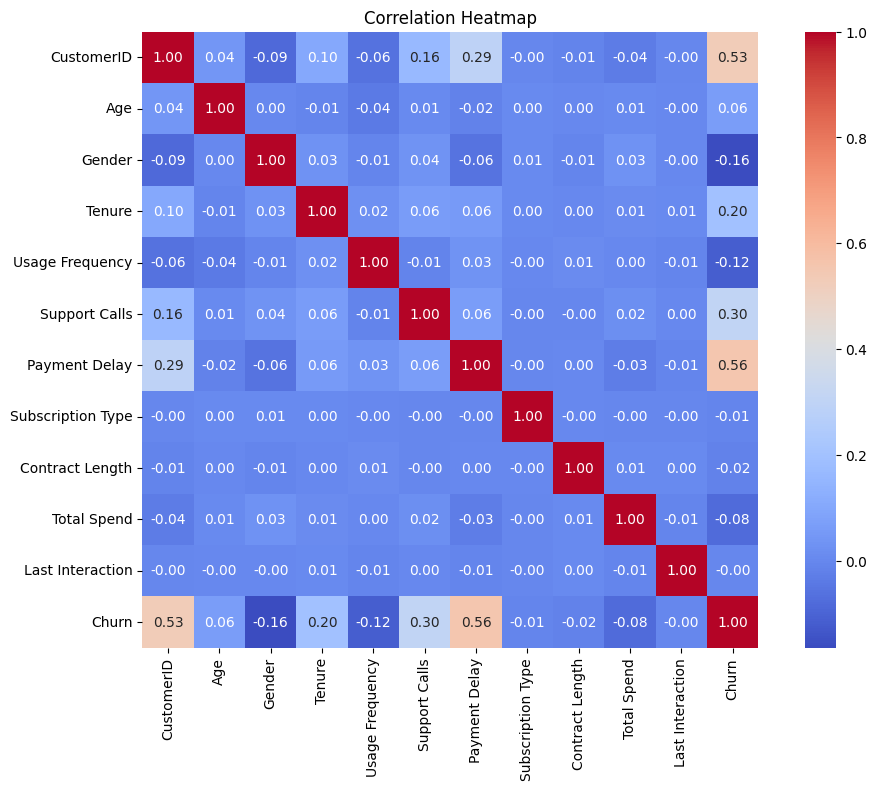

In [12]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

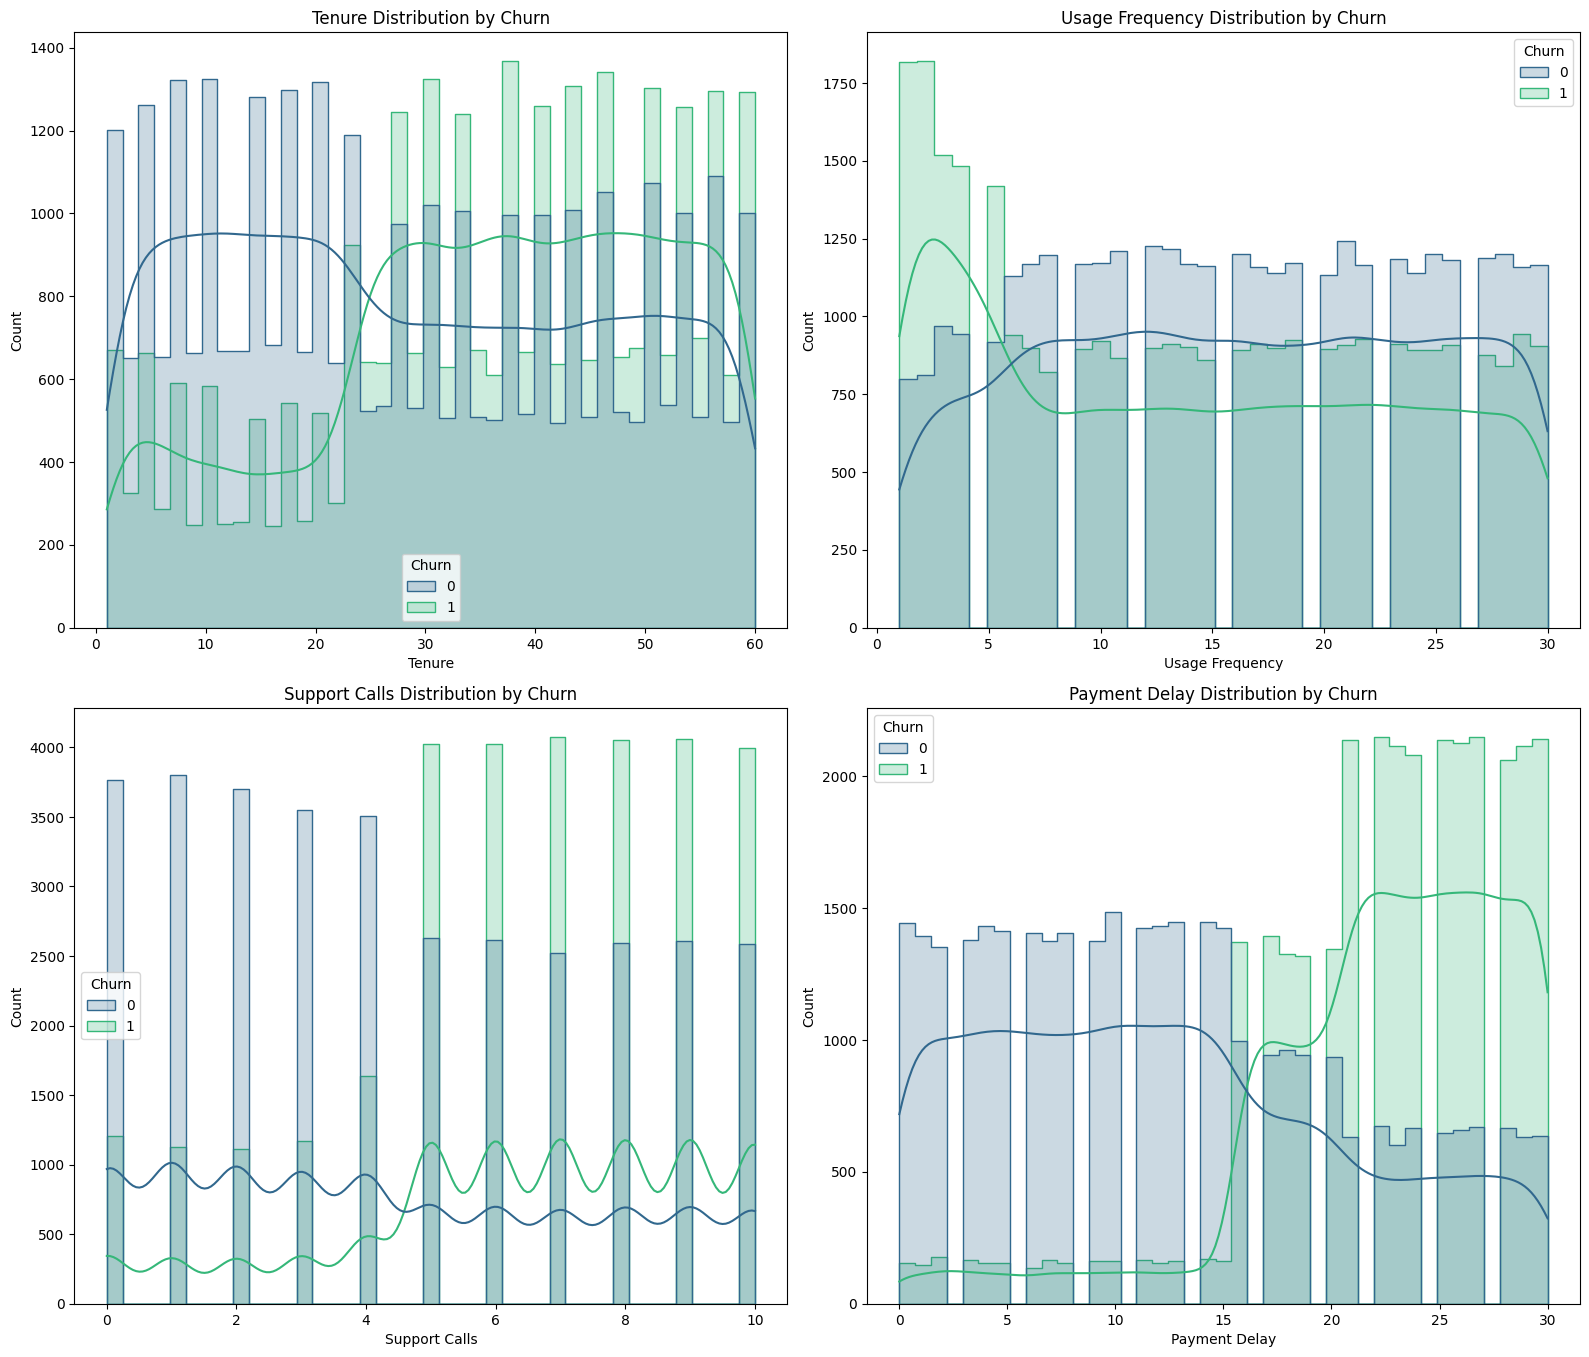

In [13]:
# 3. Feature Distributions by Churn
features = ["Tenure", "Usage Frequency", "Support Calls", "Payment Delay"]
plt.figure(figsize=(16, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue="Churn", kde=True, element="step", palette="viridis")
    plt.title(f"{feature} Distribution by Churn")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 'test_size=0.7' means 70% of the data will be used for testing, and 30% for training
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.7, random_state=42)

In [15]:
#Data Normalization
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()
#StandardScaler scales the features by removing the mean and scaling to unit
#variance, which standardizes each feature to have a mean of 0 and a standard
#deviation of 1. This helps the model by ensuring that each feature contributes
#equally, preventing features with larger values from dominating the training
#process.

# Fit and transform the training data
X_train = scaler.fit_transform(xTrain)

# Only transform the test data (do not fit again)
X_test = scaler.transform(xTest)

In [16]:
# Print the shape of the training feature set
print("xTrain shape:", xTrain.shape)

# Print the shape of the test feature set
print("xTest shape:", xTest.shape)

# Print the shape of the training target set
print("yTrain shape:", yTrain.shape)

# Print the shape of the test target set
print("yTest shape:", yTest.shape)

xTrain shape: (19312, 9)
xTest shape: (45062, 9)
yTrain shape: (19312,)
yTest shape: (45062,)


In [17]:
# Import the RandomForestClassifier from the sklearn.ensemble module

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the gini index and 100 decision trees. Train
# the model, in such a way that allows the trees to grow until all leaves are pure or contain fewer samples than the minimum allowed

rf_class = RandomForestClassifier(criterion='gini', n_estimators=100, min_samples_split=2, random_state=42)

In [18]:
# Train (fit) the Random Forest model on the training data

rf_class.fit(xTrain, yTrain)

RandomForestClassifier(random_state=42)

In [19]:
# Use the trained Random Forest model to predict the species on the test data

yHat = rf_class.predict(xTest)

In [20]:
# Import performance metrics

from sklearn.metrics import accuracy_score

In [21]:
# Evaluate model performance

accuracy = rf_class.score(xTest, yTest)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


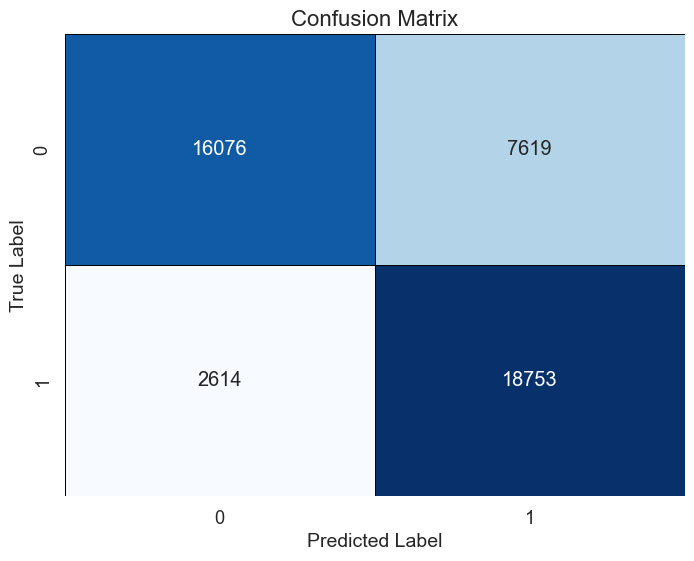

In [22]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix by evaluating yTest and yHat
cm = confusion_matrix(yTest, yHat)


# Set up the figure size and font scale for better readability
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)

# Create a sns.heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5, linecolor='black')

# Add labels and title to the heatmap
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)



# Show the plot
plt.show()

In [23]:
from sklearn.metrics import classification_report
                                                                                                                                            
report = classification_report(yTest, yHat)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76     23695
           1       0.71      0.88      0.79     21367

    accuracy                           0.77     45062
   macro avg       0.79      0.78      0.77     45062
weighted avg       0.79      0.77      0.77     45062



c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


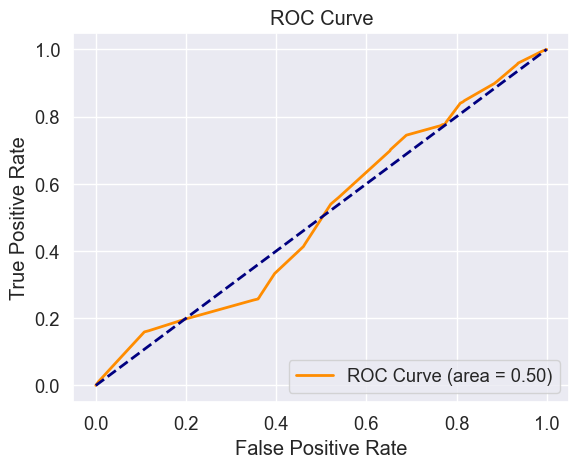

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate probability predictions (adjust 'model' according to your specific model)
y_proba = rf_class.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(yTest, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


The ROC curve in the image you've shared shows a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) for a binary classification model. Here’s an interpretation of the results:

1. **Curve Pattern**: The ROC curve (orange line) follows a nearly diagonal path from the bottom left to the top right. This pattern indicates that the model is not distinguishing between classes better than random guessing.

2. **AUC Score**: The Area Under the Curve (AUC) is 0.50, which aligns with the ROC curve's diagonal shape. An AUC of 0.50 suggests that the model has no discriminatory power—it is as good as a random classifier. In other words, the model is no better than flipping a coin to predict the correct class.

3. **Implications**: A classifier with an AUC of 0.50 is generally considered ineffective. This could happen for a few reasons:
   - The features used in the model may not be informative enough for classification.
   - The model might be improperly trained or misconfigured.
   - There could be issues with the data itself, such as poor quality, imbalance, or mislabeled instances.

### Recommendations
To improve this model's performance, you could:
- **Analyze and enhance feature selection**: Check if the features used have a significant impact on the target variable.
- **Try different models**: Some models might perform better depending on the nature of your data.
- **Handle class imbalance** (if it exists): Techniques such as resampling or adjusting class weights can sometimes improve model performance.
- **Hyperparameter tuning**: Adjust the model's hyperparameters to find a better configuration.

This plot suggests that improvements are needed for this model to be useful for prediction.